In [9]:
import matplotlib.pyplot as plt
from input import *
import pandas as pd
import numpy as np
import tools as t
import forces as f
import math as m

In [10]:
folder_name = 'Results4'
folder_name_lin = folder_name + '_linear'
folder_name_nonlin = folder_name + '_non-linear'

In [11]:
ligaments = ['ACLa', 'ACLp', 'PCLa', 'PCLp', 'LCL', 'MCLa', 'MCLo', 'MCLd']
dflig_lin = pd.read_csv(folder_name_lin + '/ligaments/' + ligaments[0] + '.csv', sep=',', header=None)
lig_lin = dflig_lin.to_numpy()
dflig_nonlin = pd.read_csv(folder_name_nonlin + '/ligaments/' + ligaments[0] + '.csv', sep=',', header=None)
lig_nonlin = dflig_nonlin.to_numpy()

lig_lin_lenght = np.empty([lig_lin.shape[0], 0])
lig_nonlin_lenght = np.empty([lig_nonlin.shape[0], 0])

for i in range(len(ligaments)):
    dflig_lin = pd.read_csv(folder_name_lin + '/ligaments/' + ligaments[i] + '.csv', sep=',', header=None)
    lig_lin = dflig_lin.to_numpy()
    lig_lin_lenght = np.append(lig_lin_lenght, lig_lin[:, 0].reshape(lig_lin.shape[0], 1), axis=1)

    dflig_nonlin = pd.read_csv(folder_name_nonlin + '/ligaments/' + ligaments[i] + '.csv', sep=',', header=None)
    lig_nonlin = dflig_nonlin.to_numpy()
    lig_nonlin_lenght = np.append(lig_nonlin_lenght, lig_nonlin[:, 0].reshape(lig_nonlin.shape[0], 1), axis=1)

gait_cycle = motion[::step, 2]
gait_cycle_lin = gait_cycle[0:lig_lin_lenght.shape[0]]
gait_cycle_nonlin = gait_cycle[0:lig_nonlin_lenght.shape[0]]

Napětí vazu

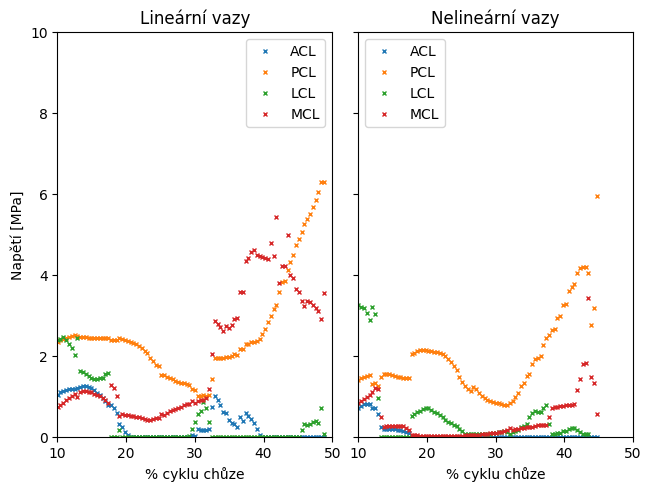

In [12]:
area = [42, 60, 18, 25]
ACL_stress_lin = (lig_lin_lenght[:, 0] + lig_lin_lenght[:, 1]) / area[0]
PCL_stress_lin = (lig_lin_lenght[:, 2]+lig_lin_lenght[:, 3])/area[1]
LCL_stress_lin = (lig_lin_lenght[:, 4]) / area[2]
MCL_stress_lin = (lig_lin_lenght[:, 5]+lig_lin_lenght[:, 6]+lig_lin_lenght[:, 7])/area[3]

# print(ACL_stress_lin)

ACL_stress_nonlin= (lig_nonlin_lenght[:, 0] + lig_nonlin_lenght[:, 1]) / area[0]
PCL_stress_nonlin=(lig_nonlin_lenght[:, 2]+lig_nonlin_lenght[:, 3])/area[1]
LCL_stress_nonlin= (lig_nonlin_lenght[:, 4]) / area[2]
MCL_stress_nonlin=(lig_nonlin_lenght[:, 5]+lig_nonlin_lenght[:, 6]+lig_nonlin_lenght[:, 7])/area[3]

# ligament_stress_lin = np.append(ACL_stress_lin, [PCL_stress_lin, LCL_stress_lin, MCL_stress_lin], axis=1)
ligament_stress_lin = [ACL_stress_lin, PCL_stress_lin, LCL_stress_lin, MCL_stress_lin]
ligament_stress_nonlin = [ACL_stress_nonlin, PCL_stress_nonlin, LCL_stress_nonlin, MCL_stress_nonlin]
# print(ligament_stress_nonlin)

ligament_stress = ['ACL', 'PCL', 'LCL', 'MCL']

fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True)

axs[0].plot(gait_cycle_lin, ACL_stress_lin, 'x', label=ligament_stress[0], markersize=3)
axs[1].plot(gait_cycle_nonlin, ACL_stress_nonlin, 'x', label=ligament_stress[0], markersize=3)

axs[0].plot(gait_cycle_lin, PCL_stress_lin, 'x', label=ligament_stress[1], markersize=3)
axs[1].plot(gait_cycle_nonlin, PCL_stress_nonlin, 'x', label=ligament_stress[1], markersize=3)

axs[0].plot(gait_cycle_lin, LCL_stress_lin, 'x', label=ligament_stress[2], markersize=3)
axs[1].plot(gait_cycle_nonlin, LCL_stress_nonlin, 'x', label=ligament_stress[2], markersize=3)

axs[0].plot(gait_cycle_lin, MCL_stress_lin, 'x', label=ligament_stress[3], markersize=3)
axs[1].plot(gait_cycle_nonlin, MCL_stress_nonlin, 'x', label=ligament_stress[3], markersize=3)

axs[0].set_xlabel('% cyklu chůze')
axs[0].set_ylabel('Napětí [MPa]')
axs[0].legend()
axs[0].set_xlim(10, 50)
axs[0].set_ylim(0, 10)
axs[0].set_title('Lineární vazy')

axs[1].set_xlabel('% cyklu chůze')
axs[1].legend()
axs[1].set_xlim(10, 50)
axs[1].set_title('Nelineární vazy')

fig.savefig('results/' + folder_name + 'stress_ligaments.png', dpi=1000)

Síla ve vazu

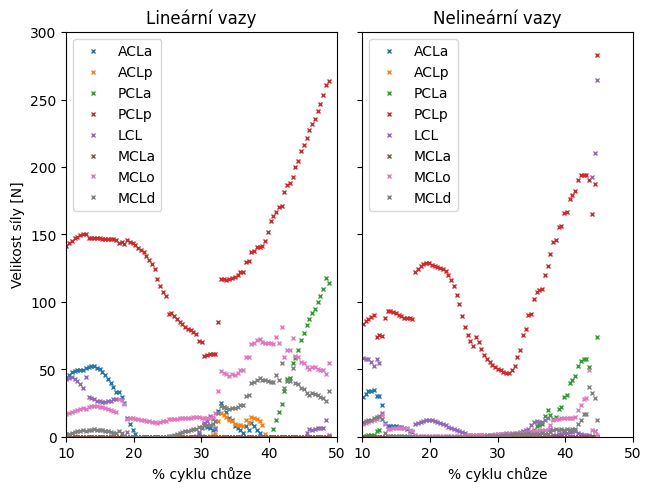

In [13]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True)

for i in range(len(ligaments)):
    axs[0].plot(gait_cycle_lin, lig_lin_lenght[:, i], 'x', label=ligaments[i], markersize=3)
    axs[1].plot(gait_cycle_nonlin, lig_nonlin_lenght[:, i], 'x', label=ligaments[i], markersize=3)

axs[0].set_xlabel('% cyklu chůze')
axs[0].set_ylabel('Velikost síly [N]')
axs[0].legend()
axs[0].set_xlim(10, 50)
axs[0].set_ylim(0, 300)
axs[0].set_title('Lineární vazy')

axs[1].set_xlabel('% cyklu chůze')
axs[1].legend()
axs[1].set_xlim(10, 50)
axs[1].set_title('Nelineární vazy')

fig.savefig('results/' + folder_name + 'ligaments.png', dpi=1000)

Kinematika

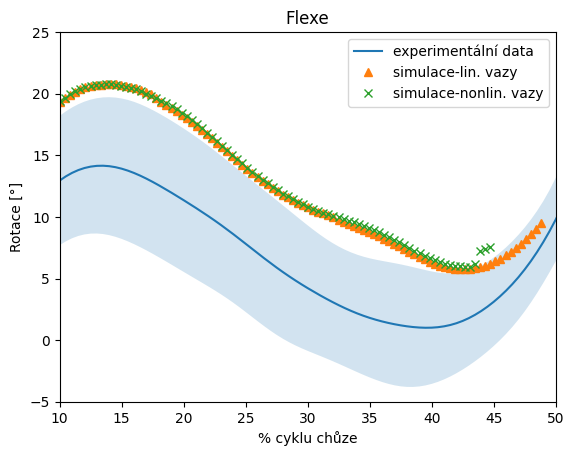

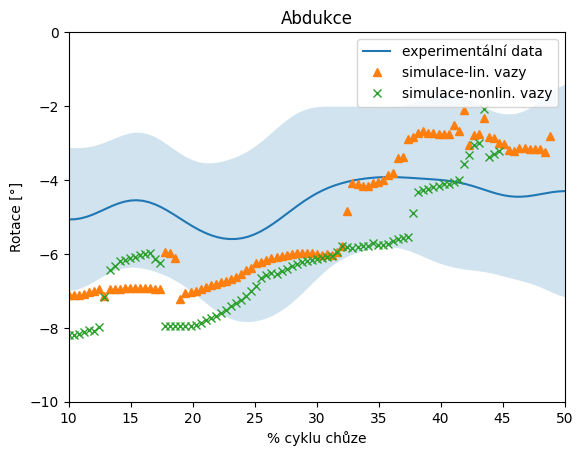

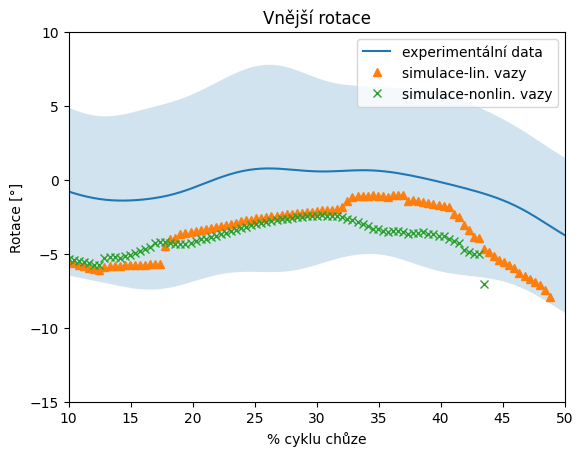

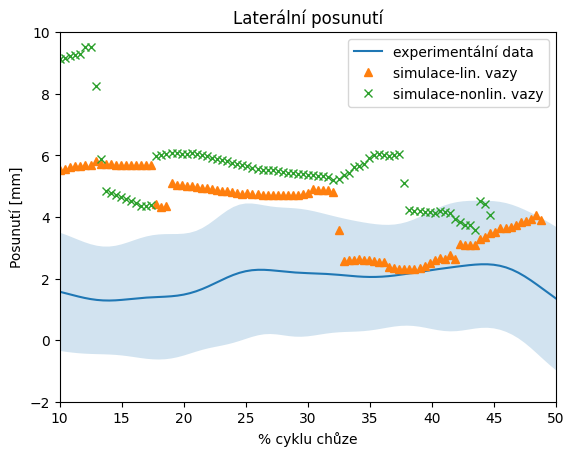

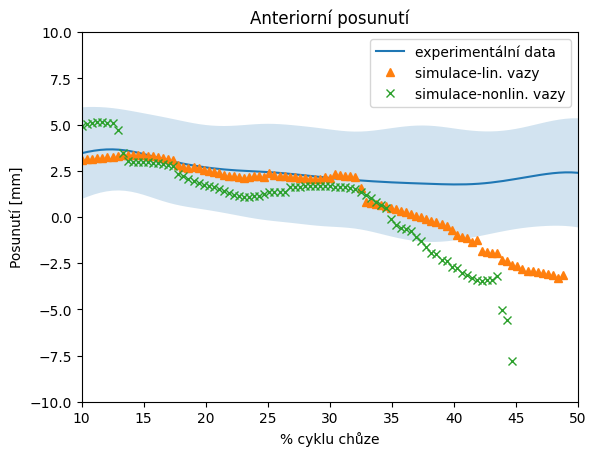

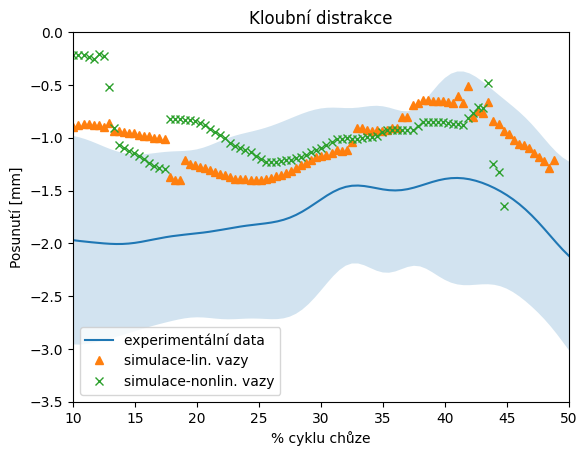

In [14]:
dtmeasurement = pd.read_excel('jor24226-sup-0001-suppdata-s1.xlsx', sheet_name='Tibiofemoral Joint', skiprows=6,
                              usecols='A:O')
measurement = dtmeasurement.to_numpy()

dfcoor_lin = pd.read_csv(folder_name_lin + '/coor_femur.csv', sep=',', header=None)
coor_femur_lin = dfcoor_lin.to_numpy()
dfcoor_nonlin = pd.read_csv(folder_name_nonlin + '/coor_femur.csv', sep=',', header=None)
coor_femur_nonlin = dfcoor_nonlin.to_numpy()

transform01 = np.array([[m.cos(m.radians(177.649773114)), m.cos(m.radians(89.276231778)),
                         m.cos(m.radians(92.235887685)), 6.58584351],
                        [m.cos(m.radians(90.664024791)), m.cos(m.radians(178.324891517)),
                         m.cos(m.radians(91.537806121)), 7.197716174],
                        [m.cos(m.radians(92.254369549)), m.cos(m.radians(91.510597611)),
                         m.cos(m.radians(2.714119523)), 0.211836744],
                        [0, 0, 0, 1]])

R1lin, R2lin, R3lin, T1lin, T2lin, T3lin = t.motions(coor_femur_lin, transform01)
R1nonlin, R2nonlin, R3nonlin, T1nonlin, T2nonlin, T3nonlin = t.motions(coor_femur_nonlin, transform01)

gait_cycle = motion[::step, 2]
gait_cycle_lin = gait_cycle[0:coor_femur_lin.shape[0]]
gait_cycle_nonlin = gait_cycle[0:coor_femur_nonlin.shape[0]]

measurement_gait_cycle = measurement[:, 0]
measurement_T1 = measurement[:, 1]
measurement_T2 = measurement[:, 2]
measurement_T3 = measurement[:, 3]
measurement_R1 = measurement[:, 4]
measurement_R2 = measurement[:, 5]
measurement_R3 = measurement[:, 6]
measurement_T1_err = measurement[:, 8]
measurement_T2_err = measurement[:, 9]
measurement_T3_err = measurement[:, 10]
measurement_R1_err = measurement[:, 11]
measurement_R2_err = measurement[:, 12]
measurement_R3_err = measurement[:, 13]

t.plot_kinematics(measurement_gait_cycle, measurement_R1, measurement_R1_err, gait_cycle_lin, -R1lin, gait_cycle_nonlin,
                  -R1nonlin, 'Flexe', 'Rotace [°]', 'results/R1.png', -5, 25)
t.plot_kinematics(measurement_gait_cycle, measurement_R2, measurement_R2_err, gait_cycle_lin, R2lin, gait_cycle_nonlin,
                  R2nonlin, 'Abdukce', 'Rotace [°]', 'results/R2.png', -10, 0)
t.plot_kinematics(measurement_gait_cycle, measurement_R3, measurement_R3_err, gait_cycle_lin, -R3lin, gait_cycle_nonlin,
                  -R3nonlin, 'Vnější rotace', 'Rotace [°]', 'results/R3.png', -15, 10)
t.plot_kinematics(measurement_gait_cycle, measurement_T1, measurement_T1_err, gait_cycle_lin, -T1lin, gait_cycle_nonlin,
                  -T1nonlin, 'Laterální posunutí', 'Posunutí [mm]', 'results/T1.png', -2, 10)
t.plot_kinematics(measurement_gait_cycle, measurement_T2, measurement_T2_err, gait_cycle_lin, T2lin, gait_cycle_nonlin,
                  T2nonlin, 'Anteriorní posunutí', 'Posunutí [mm]', 'results/T2.png', -10, 10)
t.plot_kinematics(measurement_gait_cycle, measurement_T3, measurement_T3_err, gait_cycle_lin, -T3lin, gait_cycle_nonlin,
                  -T3nonlin, 'Kloubní distrakce', 'Posunutí [mm]', 'results/T3.png', -3.5, 0)


Zatížení chrupavek a menisků

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
(129,)
(129,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74

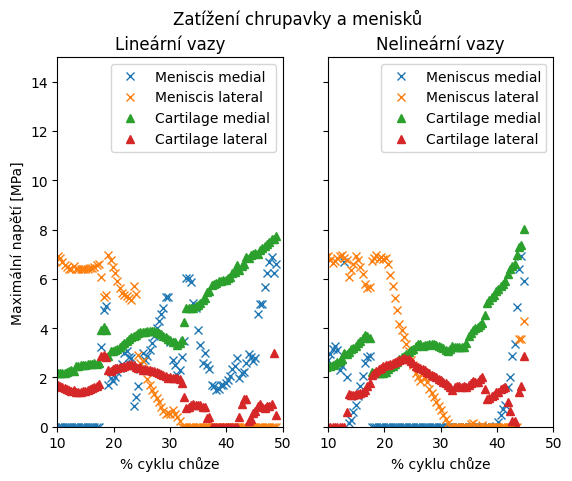

In [15]:
name1 = '/stress_meniscus/data/stress_meniscus'
name2 = '/stress_cartilage/data/stress_cartilage'

N_meniscus_length_lin_m, N_meniscus_length_lin_l, stress_meniscus_lin_m, stress_meniscus_lin_l = t.stress_time(name1, folder_name_lin)
print(gait_cycle_lin.shape)
print(stress_meniscus_lin_m.shape)

N_meniscus_length_nonlin_m, N_meniscus_length_nonlin_l, stress_meniscus_nonlin_m, stress_meniscus_nonlin_l = t.stress_time(name1, folder_name_nonlin)

N_cartilage_length_lin_m, N_cartilage_length_lin_l, stress_cartilage_lin_m, stress_cartilage_lin_l = t.stress_time(name2, folder_name_lin)
N_cartilage_length_nonlin_m, N_cartilage_length_nonlin_l, stress_cartilage_nonlin_m, stress_cartilage_nonlin_l = t.stress_time(name2, folder_name_nonlin)

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Zatížení chrupavky a menisků')
axs[0].plot(gait_cycle_lin, stress_meniscus_lin_m, 'x', label='Meniscis medial')
axs[0].plot(gait_cycle_lin, stress_meniscus_lin_l, 'x', label='Meniscis lateral')
axs[0].plot(gait_cycle_lin, stress_cartilage_lin_m, '^', label='Cartilage medial')
axs[0].plot(gait_cycle_lin, stress_cartilage_lin_l, '^', label='Cartilage lateral')
axs[0].set_xlabel('% cyklu chůze')
axs[0].set_ylabel('Maximální napětí [MPa]')
axs[0].legend()
axs[0].set_xlim(10, 50)
axs[0].set_ylim(0, 15)
axs[0].set_title('Lineární vazy')

axs[1].plot(gait_cycle_nonlin, stress_meniscus_nonlin_m, 'x', label='Meniscus medial')
axs[1].plot(gait_cycle_nonlin, stress_meniscus_nonlin_l, 'x', label='Meniscus lateral')
axs[1].plot(gait_cycle_nonlin, stress_cartilage_nonlin_m, '^', label='Cartilage medial')
axs[1].plot(gait_cycle_nonlin, stress_cartilage_nonlin_l, '^', label='Cartilage lateral')
axs[1].set_xlabel('% cyklu chůze')
axs[1].legend()
axs[1].set_xlim(10, 50)
axs[1].set_title('Nelineární vazy')

fig.savefig('results/' + folder_name + 'stressN.png', dpi=300)

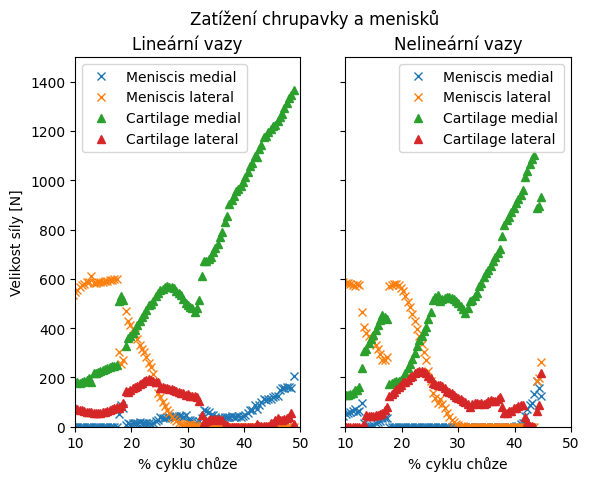

In [16]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Zatížení chrupavky a menisků')
axs[0].plot(gait_cycle_lin, N_meniscus_length_lin_m, 'x', label='Meniscis medial')
axs[0].plot(gait_cycle_lin, N_meniscus_length_lin_l, 'x', label='Meniscis lateral')
axs[0].plot(gait_cycle_lin, N_cartilage_length_lin_m, '^', label='Cartilage medial')
axs[0].plot(gait_cycle_lin, N_cartilage_length_lin_l, '^', label='Cartilage lateral')
axs[0].set_xlabel('% cyklu chůze')
axs[0].set_ylabel('Velikost síly [N]')
axs[0].legend()
axs[0].set_xlim(10, 50)
axs[0].set_ylim(0, 1500)
axs[0].set_title('Lineární vazy')

axs[1].plot(gait_cycle_nonlin, N_meniscus_length_nonlin_m, 'x', label='Meniscis medial')
axs[1].plot(gait_cycle_nonlin, N_meniscus_length_nonlin_l, 'x', label='Meniscis lateral')
axs[1].plot(gait_cycle_nonlin, N_cartilage_length_nonlin_m, '^', label='Cartilage medial')
axs[1].plot(gait_cycle_nonlin, N_cartilage_length_nonlin_l, '^', label='Cartilage lateral')
axs[1].set_xlabel('% cyklu chůze')
axs[1].legend()
axs[1].set_xlim(10, 50)
axs[1].set_title('Nelineární vazy')

fig.savefig('results/N.png', dpi=300)